### EDA Part 1

In this notebook, I (Emily) plotted some graphs.  The most interesting ones are displayed within the notebook, but what we really used for EDA is the output of my pride-and-joy function, `autoplots`, which generated histograms, boxplots, and scatterplots on all of our variables.  Because that would be difficult to look at one at a time in a notebook, it saves them to a folder, which we then flipped through like a scrapbook.  The "official" version of this folder can be found under `03_images/` (the earliest-dated one), and running this notebook will generate a new one.  In his notebook, Eli generated a correlation matrix, which was EDA part 2.

In [1]:
# Imports
import numpy as np
import os
import statsmodels.api as sm
from string import capwords
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time
import pandas as pd
pd.options.mode.chained_assignment = None 

print(f'Current working directory is {os.getcwd()}')

Current working directory is C:\Users\emily\Git_Stuff\General_Assembly\04_Projects\project-4\dsb318-group4\01_notebooks


In [2]:
os.chdir('..')
os.getcwd()

'C:\\Users\\emily\\Git_Stuff\\General_Assembly\\04_Projects\\project-4\\dsb318-group4'

In [3]:
df = pd.read_csv('./02_data/02_cleaned_datasets/ca_dropout_and_predictors_v3-2.csv')

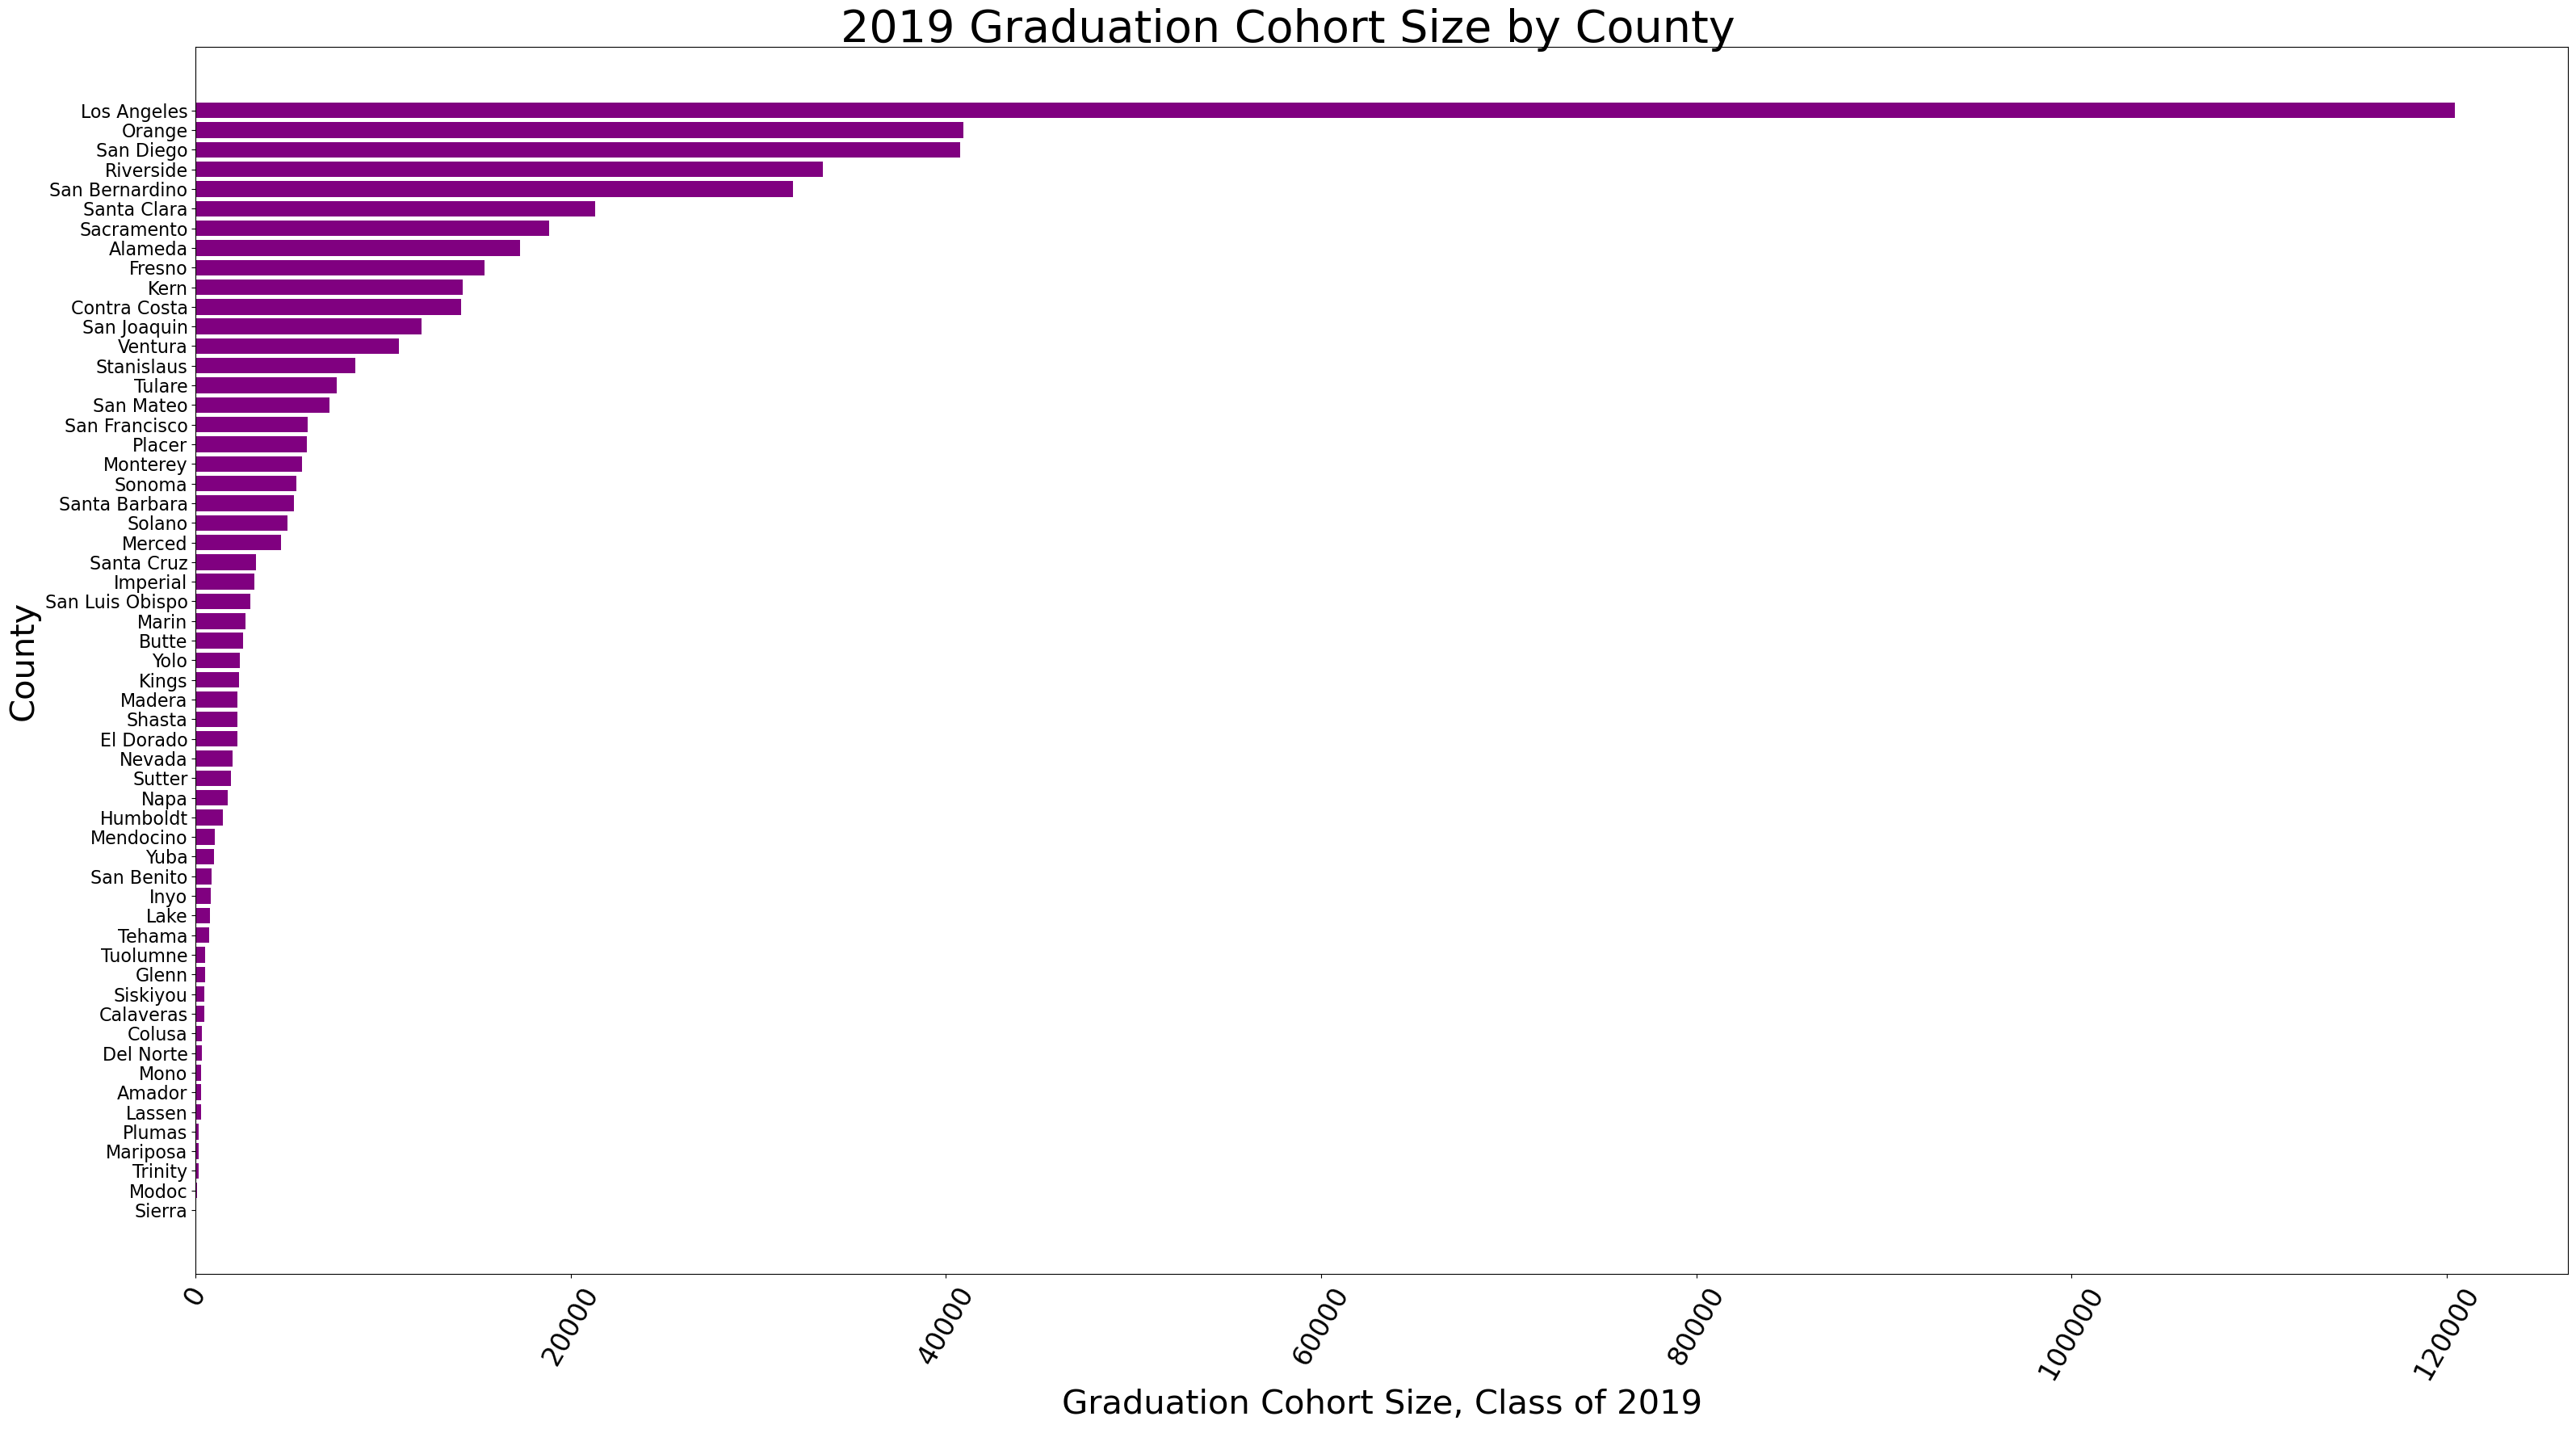

In [4]:
# Plot a bar graph of cohort size
cohorts = df[['county', 'graduation_2019_cohort_size']].sort_values(by = 'graduation_2019_cohort_size')

plt.figure(figsize = (32, 18));
plt.barh(y = cohorts['county'], width = cohorts[
  'graduation_2019_cohort_size'], height = .8, 
  align = 'center', color = 'purple');
plt.suptitle(f'2019 Graduation Cohort Size by County', size = 40)
#plt.title(f'Statewide Included Total: 494,317, 57 Counties', size = 18)
plt.xlabel(f'Graduation Cohort Size, Class of 2019', size = 30);
plt.ylabel('County', size = 30);
plt.xticks(size = 24, rotation = 60);
plt.yticks(size = 16)
plt.tight_layout()
plt.savefig(f'./03_images/output/graduation_cohort_size_by_county.png')

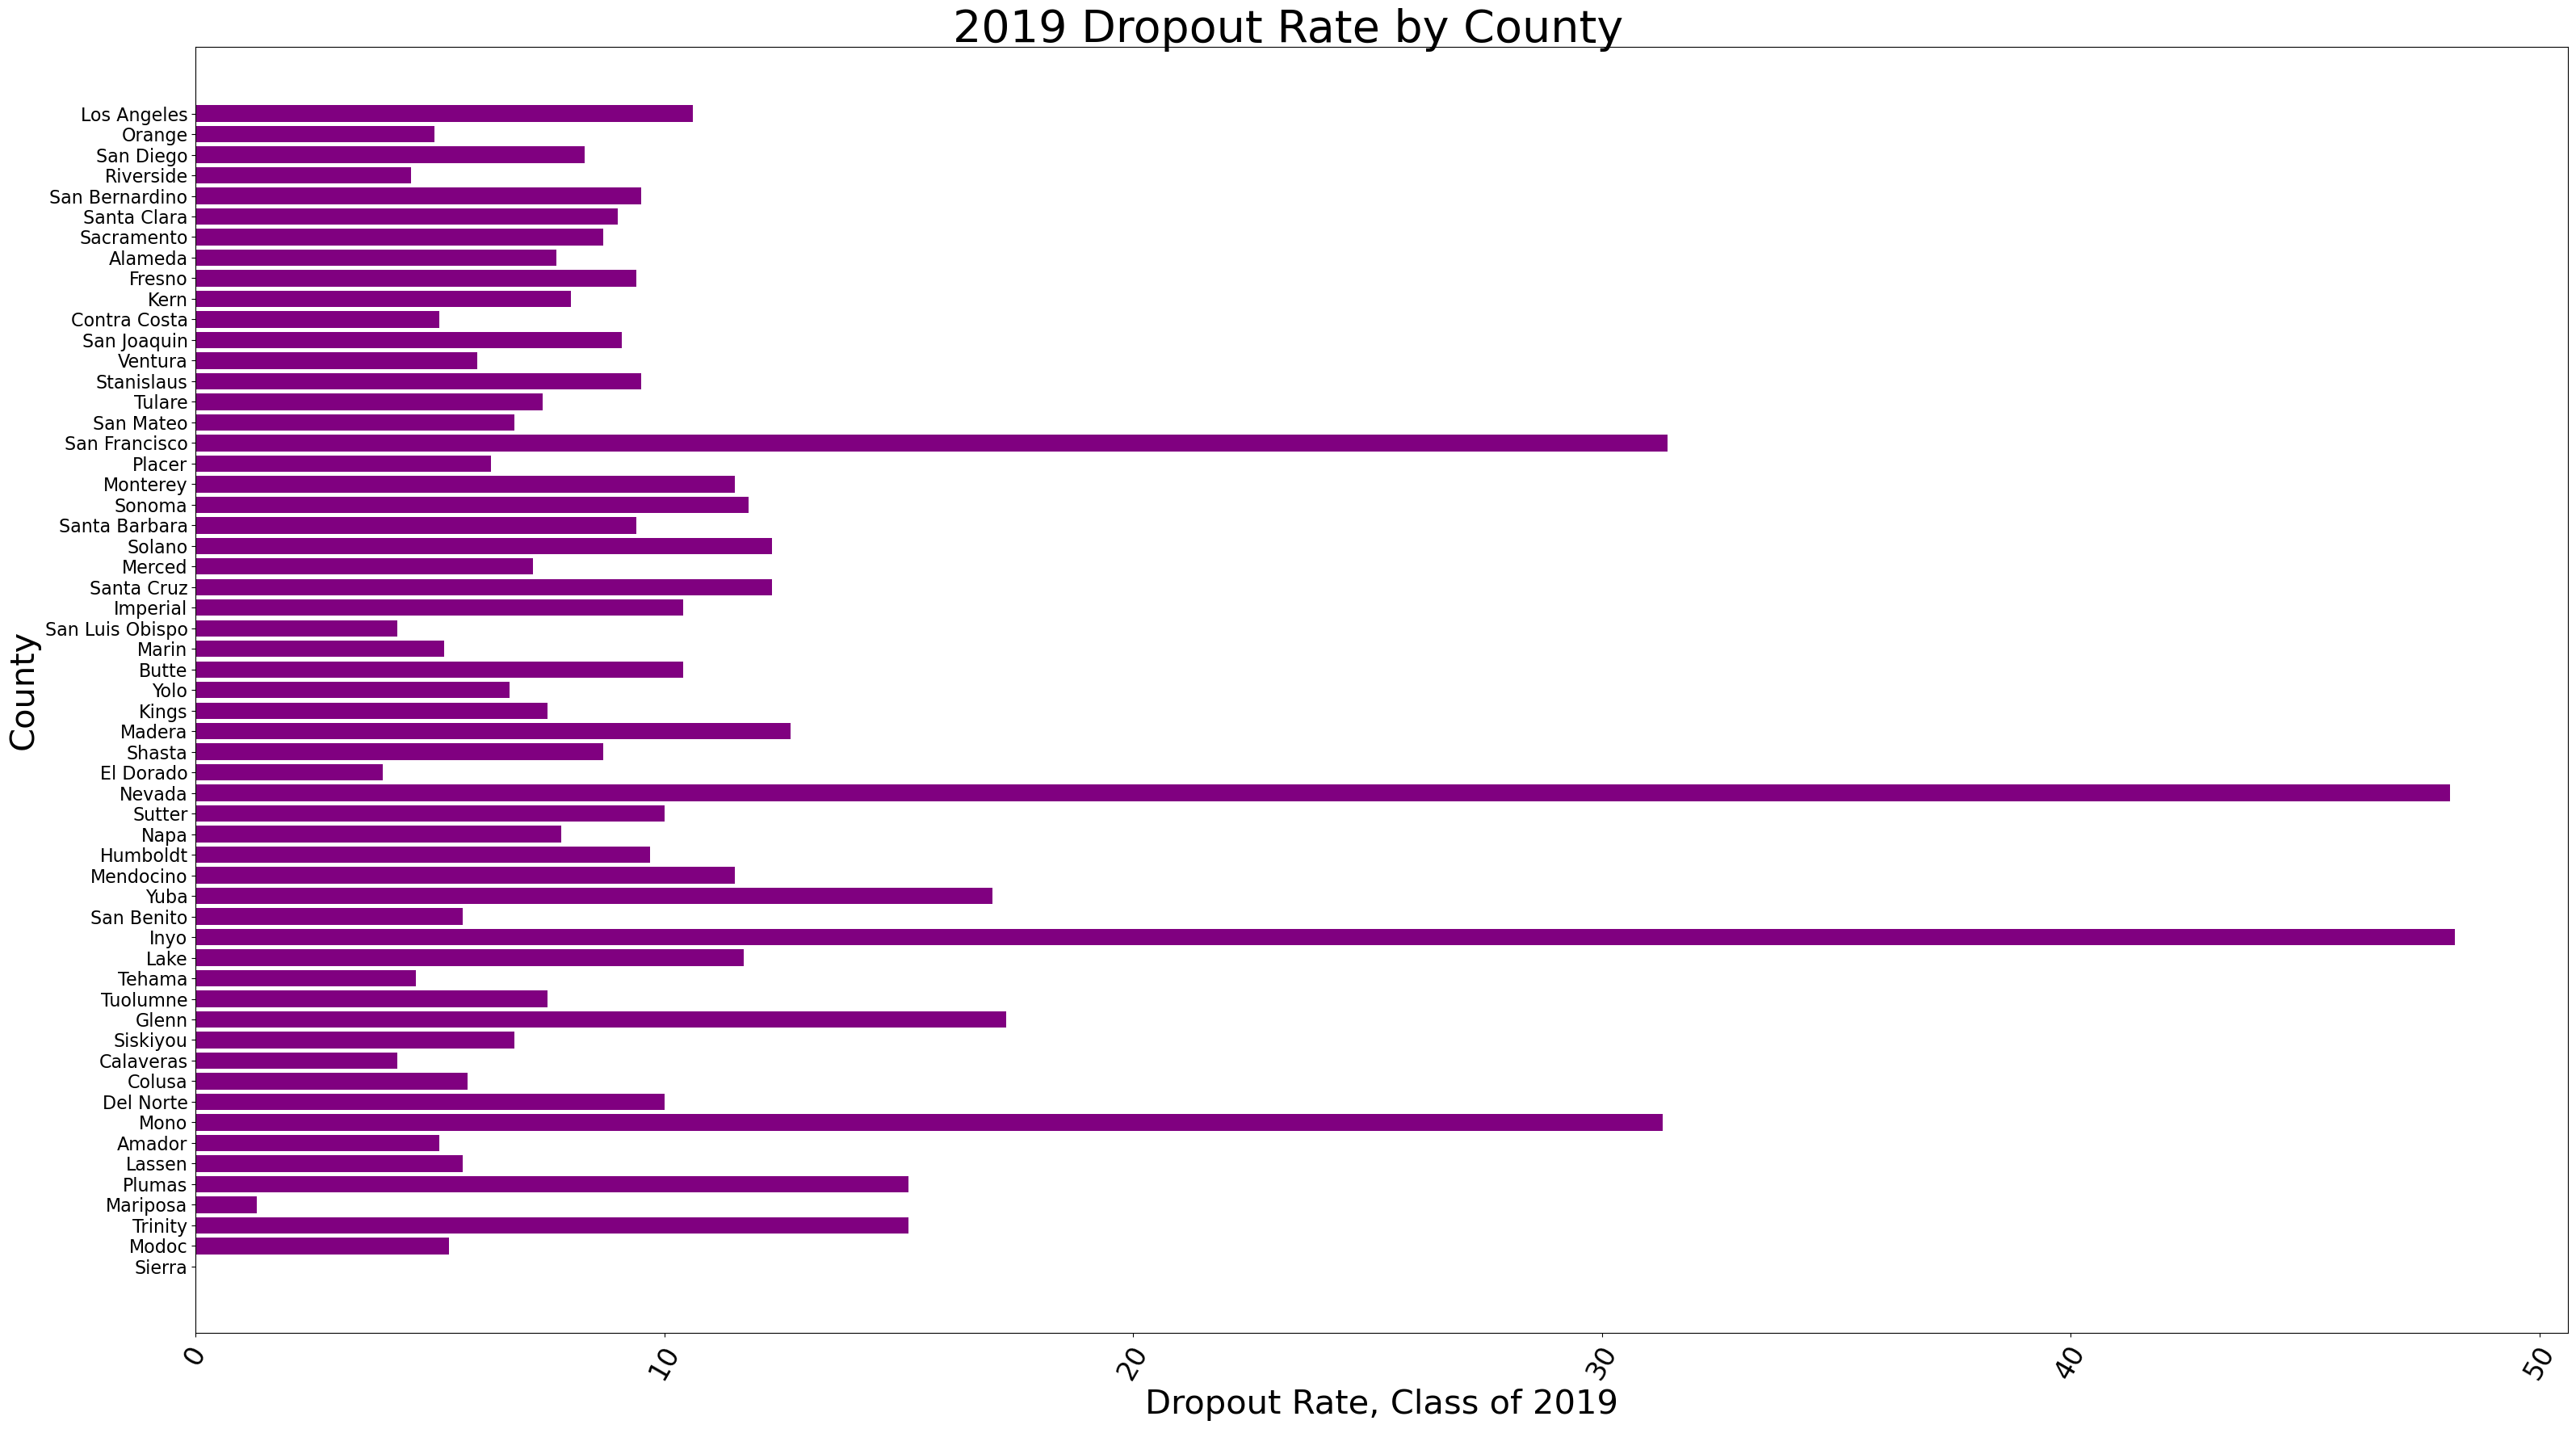

In [5]:
# Plot a bar graph of dropout rate, same order as cohort size
cohorts = df[['county', 'graduation_2019_cohort_size', 'dropout_rate_2019_cohort']].sort_values(by = 'graduation_2019_cohort_size')

plt.figure(figsize = (32, 18));
plt.barh(y = cohorts['county'], width = cohorts[
  'dropout_rate_2019_cohort'], height = .8, 
  align = 'center', color = 'purple');
plt.suptitle(f'2019 Dropout Rate by County', size = 40)
#plt.title(f'Statewide Included Total: 494,317, 57 Counties', size = 18)
plt.xlabel(f'Dropout Rate, Class of 2019', size = 30);
plt.ylabel('County', size = 30);
plt.xticks(size = 24, rotation = 60);
plt.yticks(size = 16)
plt.tight_layout()
plt.savefig(f'./03_images/output/dropout_rate_by_county_sorted_by_cohort_size.png')

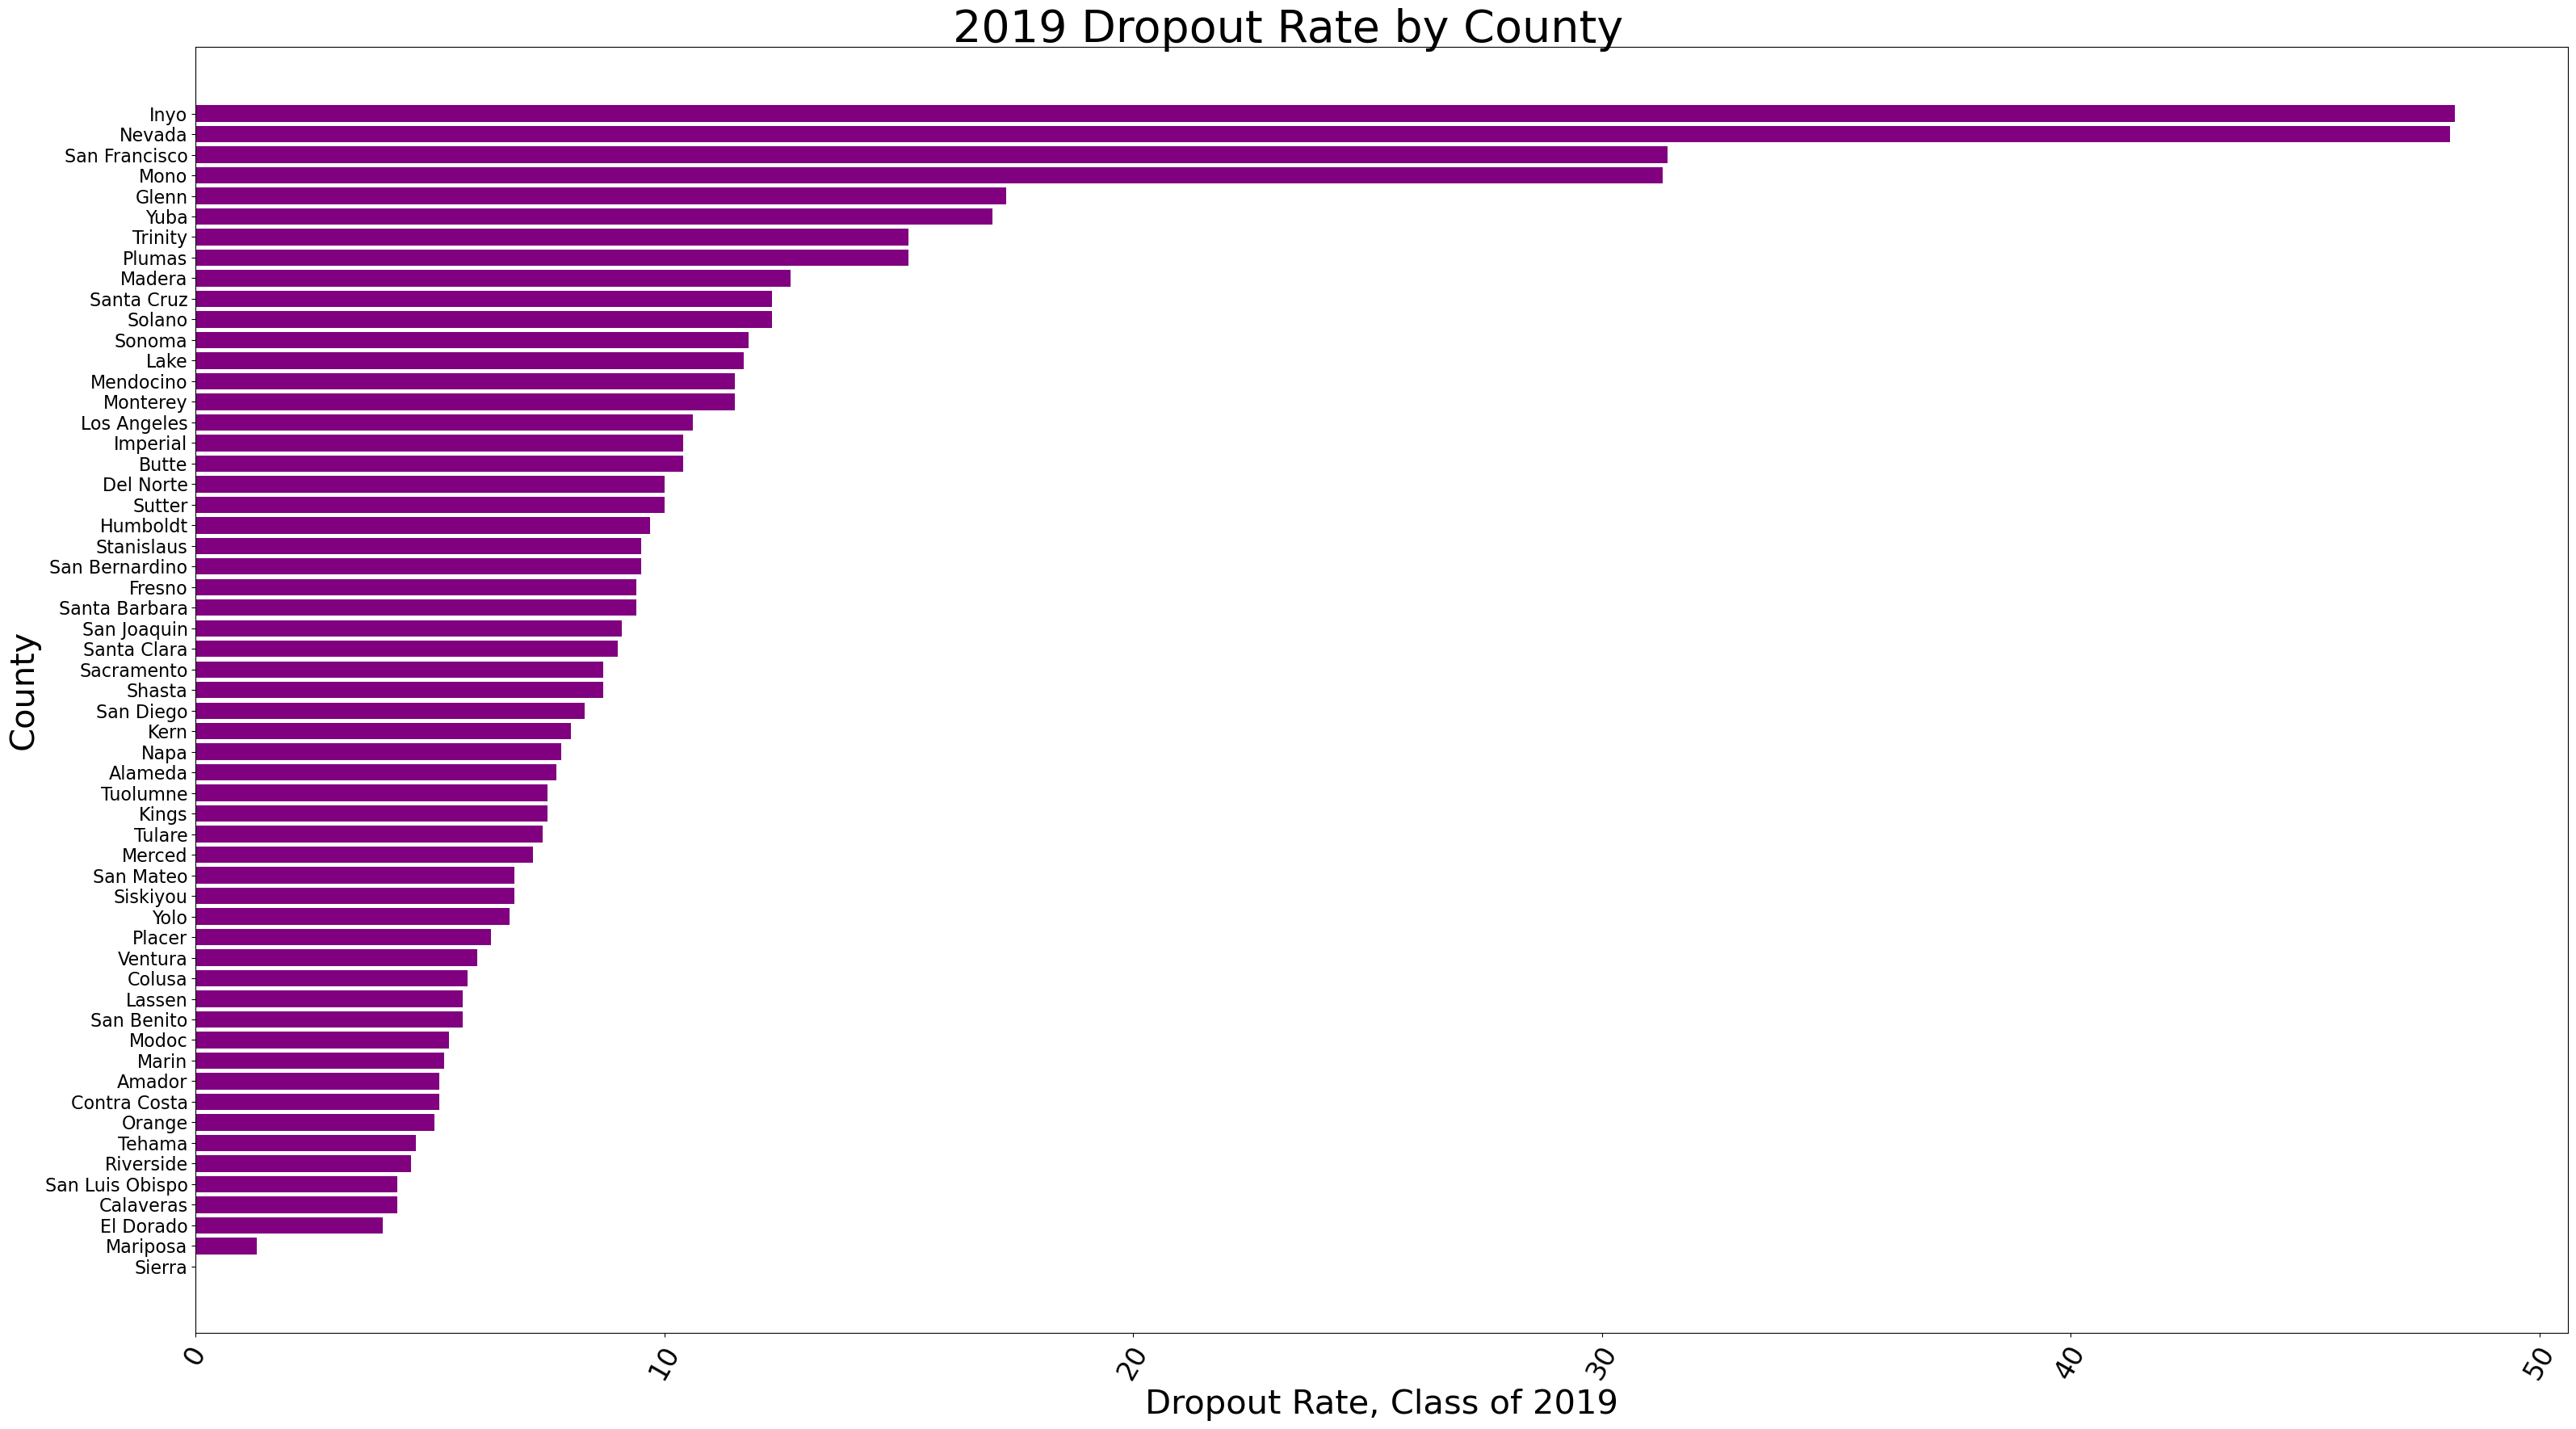

In [6]:
# Sort it
cohorts = df[['county', 'dropout_rate_2019_cohort']].sort_values(by = 'dropout_rate_2019_cohort')

plt.figure(figsize = (32, 18));
plt.barh(y = cohorts['county'], width = cohorts[
  'dropout_rate_2019_cohort'], height = .8, 
  align = 'center', color = 'purple');
plt.suptitle(f'2019 Dropout Rate by County', size = 40)
#plt.title(f'Statewide Included Total: 494,317, 57 Counties', size = 18)
plt.xlabel(f'Dropout Rate, Class of 2019', size = 30);
plt.ylabel('County', size = 30);
plt.xticks(size = 24, rotation = 60);
plt.yticks(size = 16)
plt.tight_layout()
plt.savefig(f'./03_images/output/dropout_rate_by_county.png')

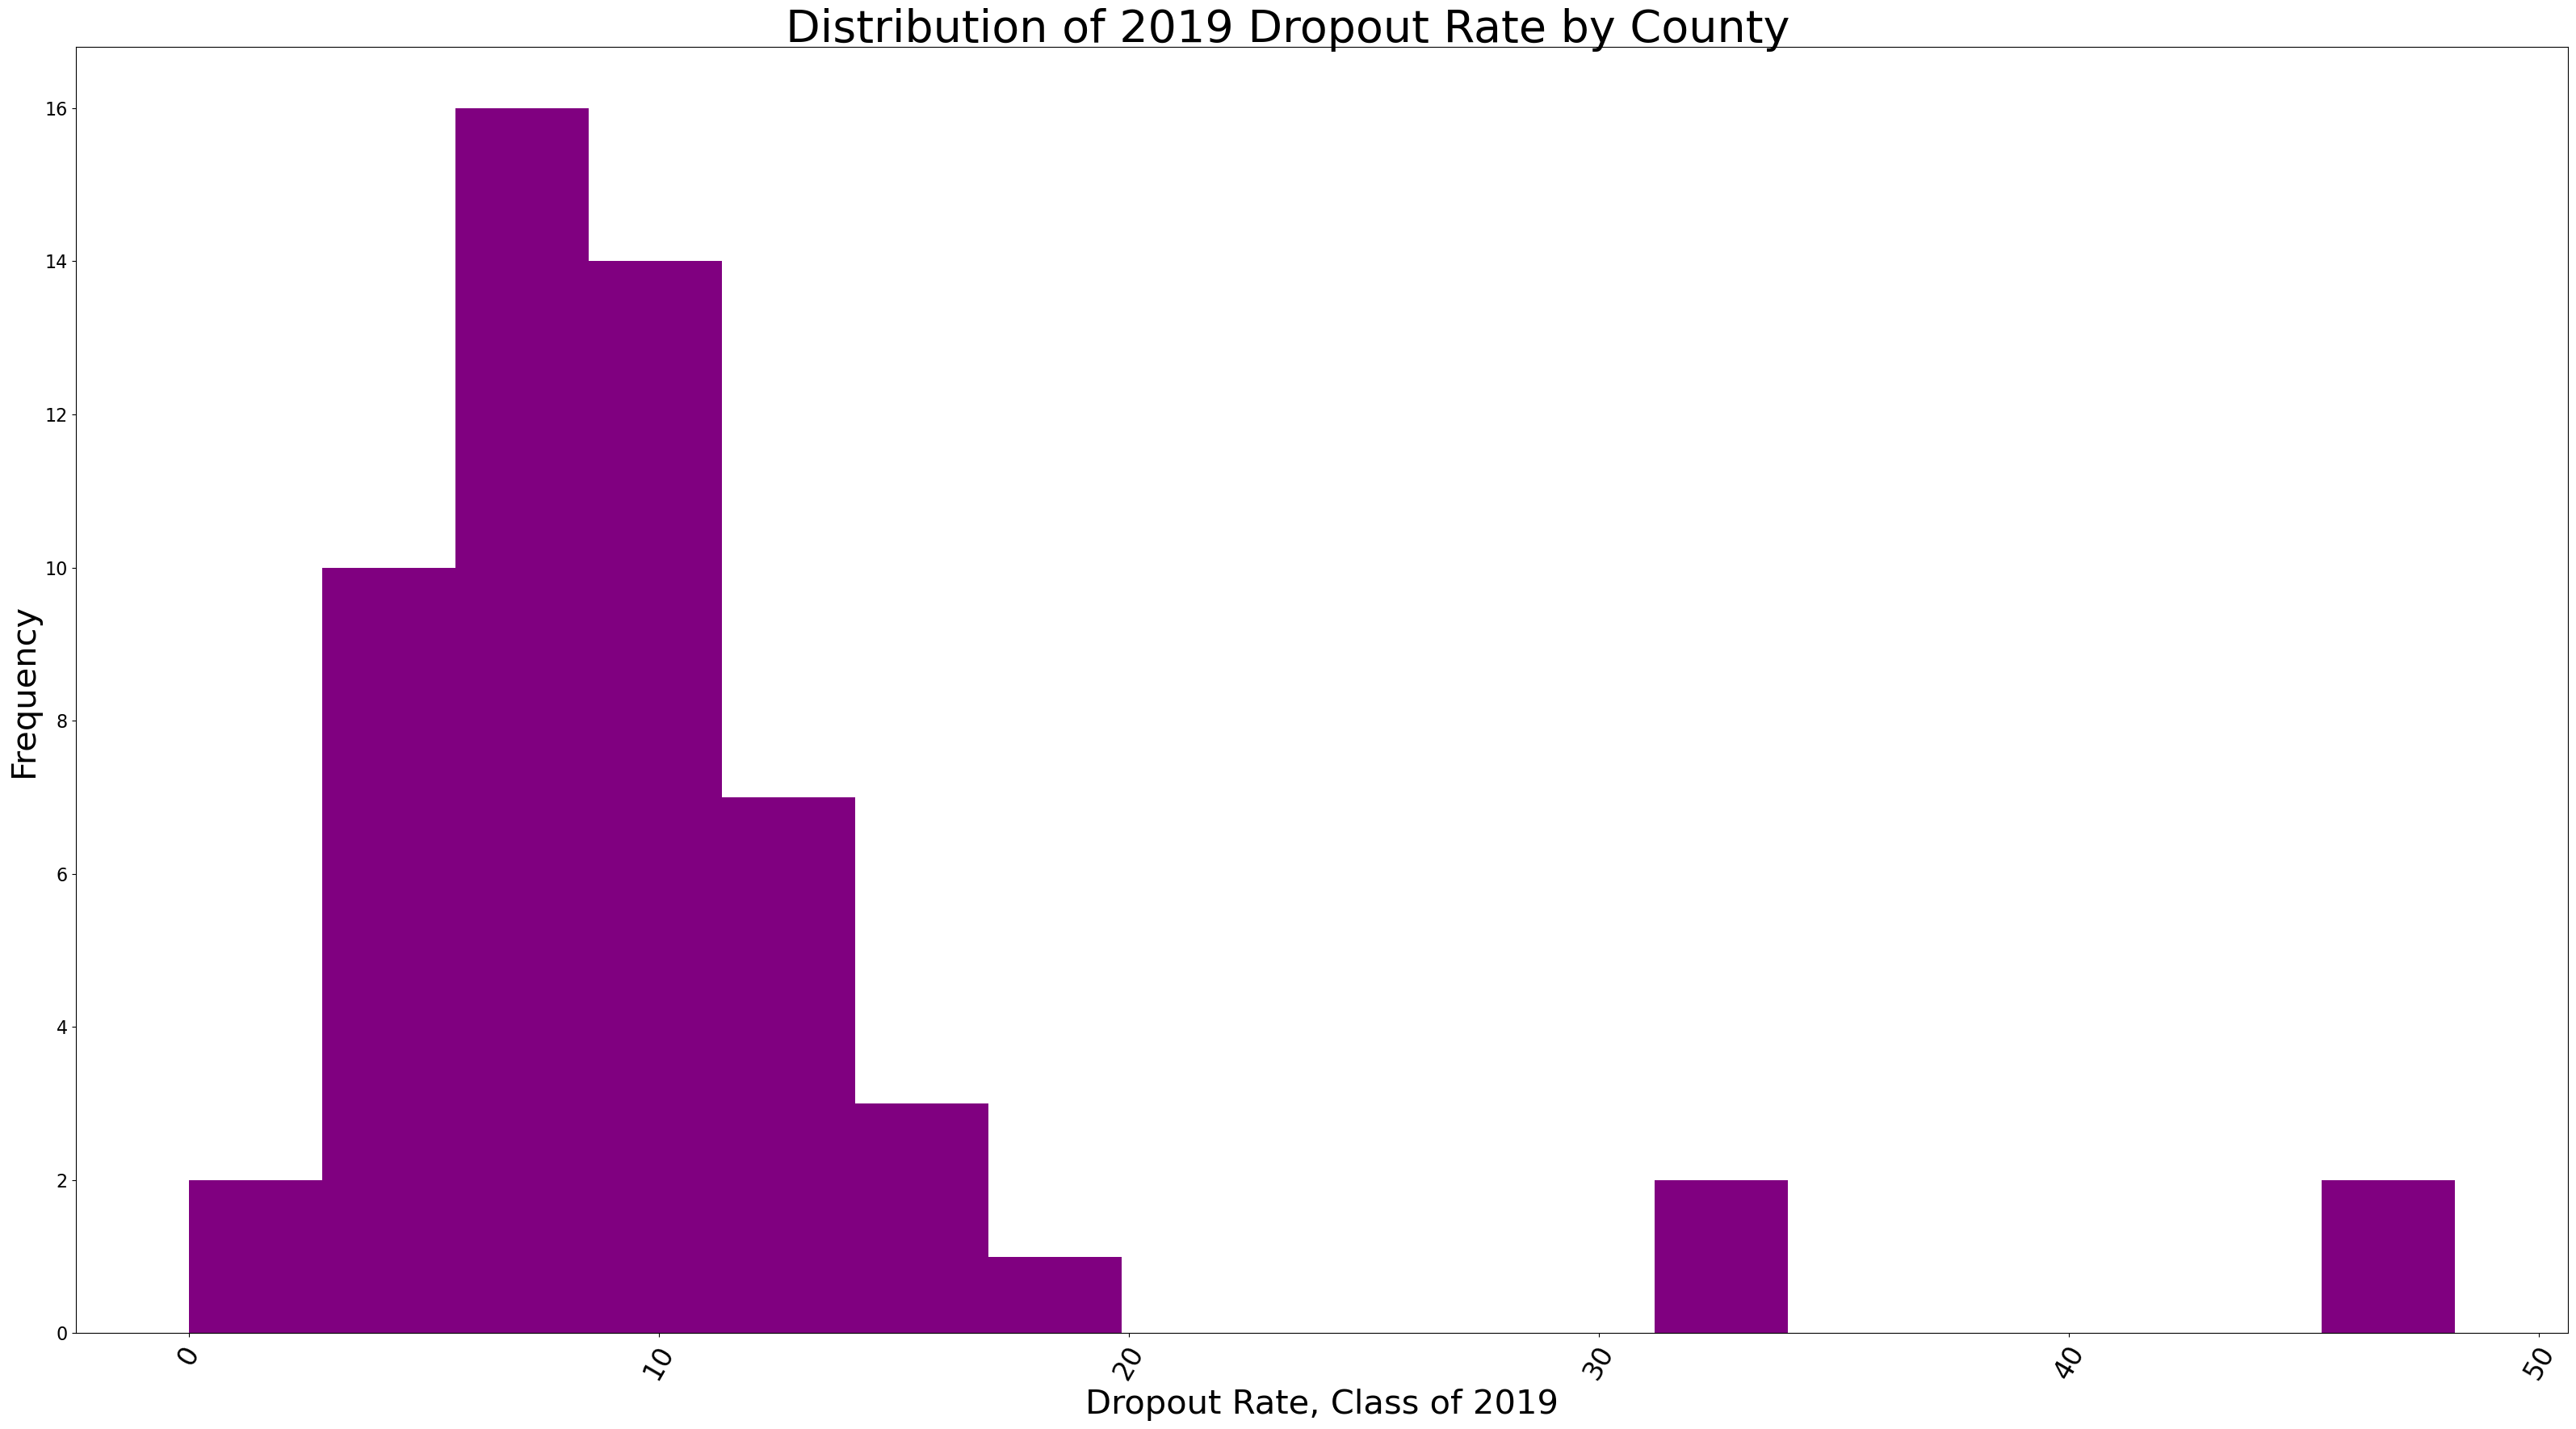

In [7]:
# Plot histogram of dropout rate
cohorts = df[['county', 'dropout_rate_2019_cohort']].sort_values(by = 'dropout_rate_2019_cohort')
cohorts['dropout_not_zero'] = cohorts['dropout_rate_2019_cohort'] + 0.0001
cohorts['dropout_log'] =cohorts['dropout_not_zero'].map(np.log)

plt.figure(figsize = (32, 18));
plt.hist(cohorts['dropout_rate_2019_cohort'], color = 'purple', bins = 'auto');
plt.suptitle(f'Distribution of 2019 Dropout Rate by County', size = 40)
#plt.title(f'Statewide Included Total: 494,317, 57 Counties', size = 18)
plt.xlabel(f'Dropout Rate, Class of 2019', size = 30);
plt.ylabel('Frequency', size = 30);
plt.xticks(size = 24, rotation = 60);
plt.yticks(size = 16)
plt.tight_layout()
plt.savefig(f'./03_images/output/hist_dropout_rate_by_county.png')

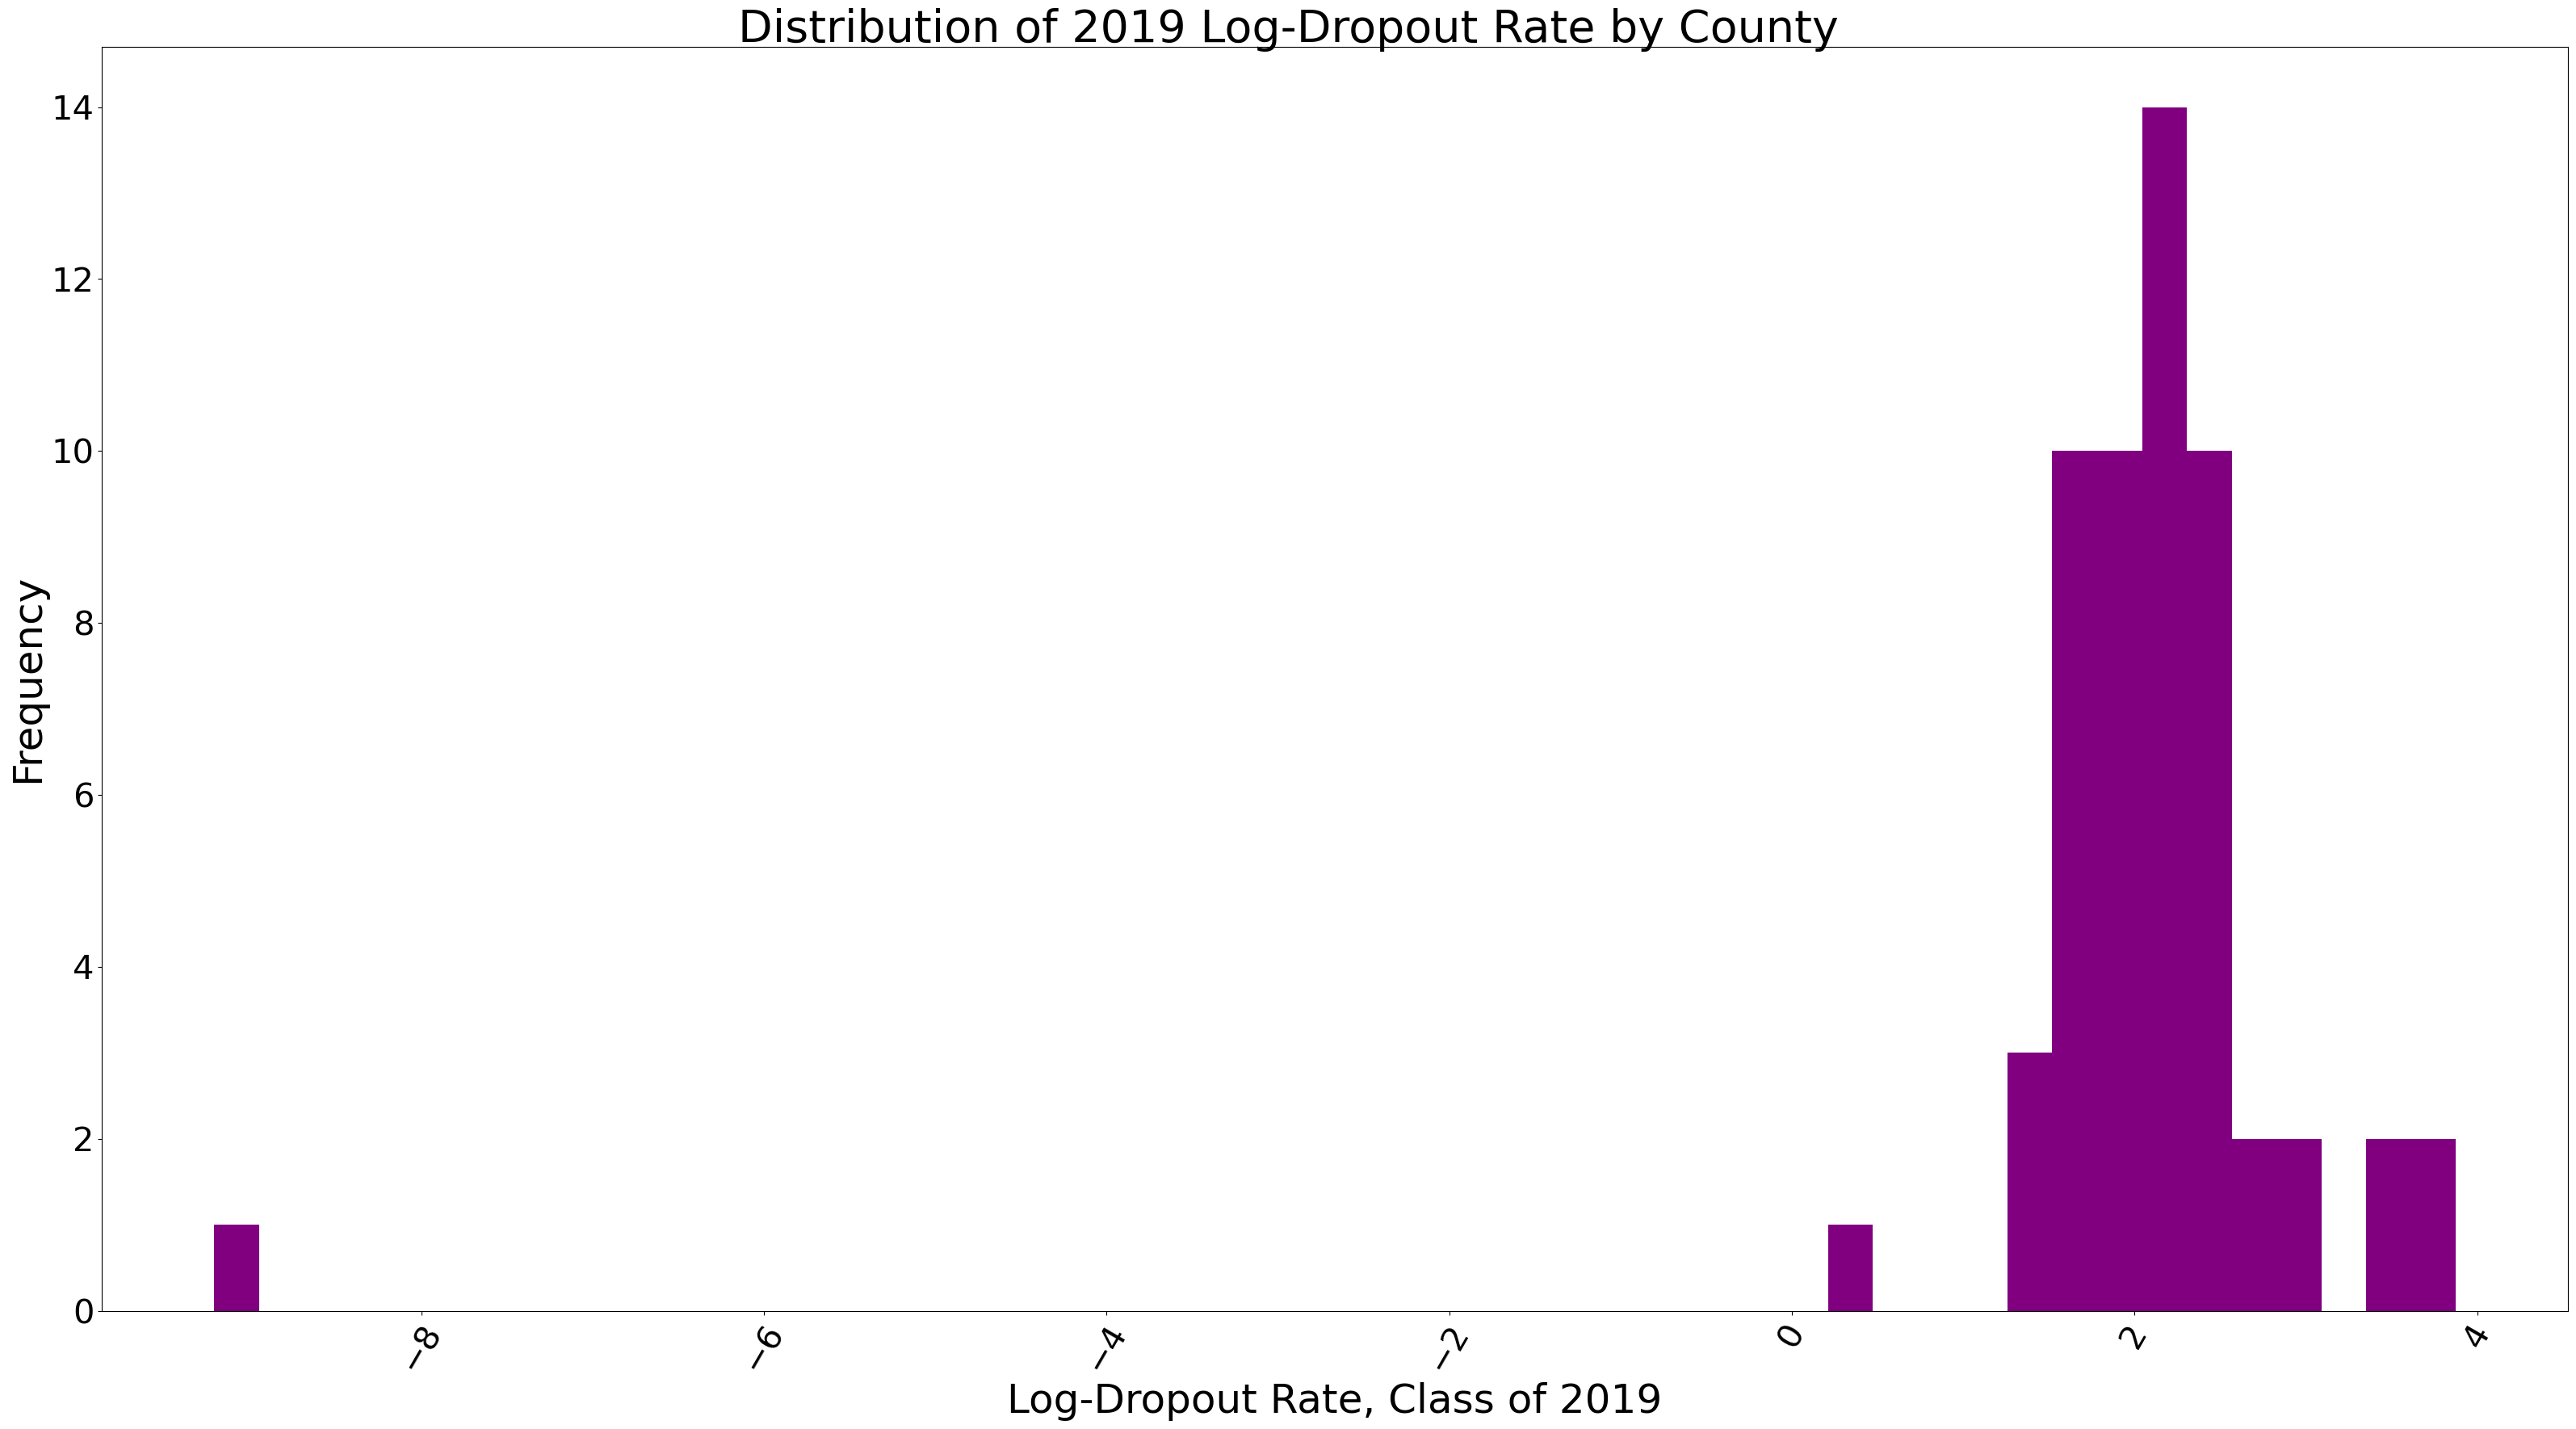

In [8]:
# Plot a histogram of log dropout rate

# These calculations were performed within a later version of the data file, 
# largely because of the plots.
cohorts = df[['county', 'dropout_rate_2019_cohort']].sort_values(by = 'dropout_rate_2019_cohort')
cohorts['dropout_not_zero'] = cohorts['dropout_rate_2019_cohort'] + 0.0001
cohorts['dropout_log'] =cohorts['dropout_not_zero'].map(np.log)

plt.figure(figsize = (32, 18));
plt.hist(cohorts['dropout_log'], color = 'purple', bins = 50);
plt.suptitle(f'Distribution of 2019 Log-Dropout Rate by County', size = 40)
#plt.title(f'Statewide Included Total: 494,317, 57 Counties', size = 18)
plt.xlabel(f'Log-Dropout Rate, Class of 2019', size = 36);
plt.ylabel('Frequency', size = 36);
plt.xticks(size = 30, rotation = 60);
plt.yticks(size = 30)
plt.tight_layout()
plt.savefig(f'./03_images/output/hist_log_dropout_rate_by_county.png')

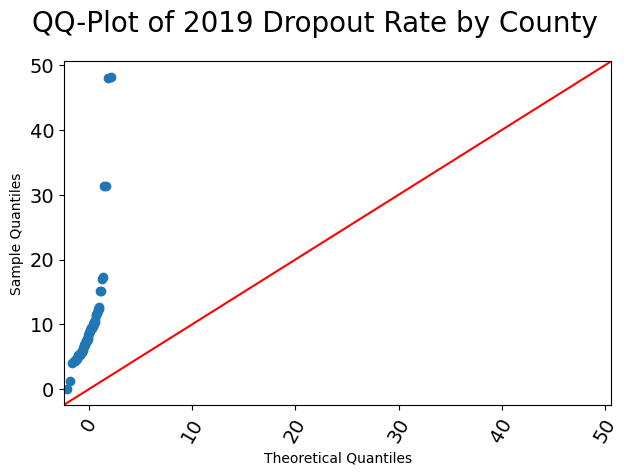

In [9]:
# QQplot of raw dropout rate
sm.qqplot(df['dropout_rate_2019_cohort'], line='45');
plt.suptitle(f'QQ-Plot of 2019 Dropout Rate by County', size = 20);
plt.xticks(size = 14, rotation = 60);
plt.yticks(size = 14);
plt.tight_layout();
plt.savefig('./03_images/output/dropout_rate_qqplot.png')

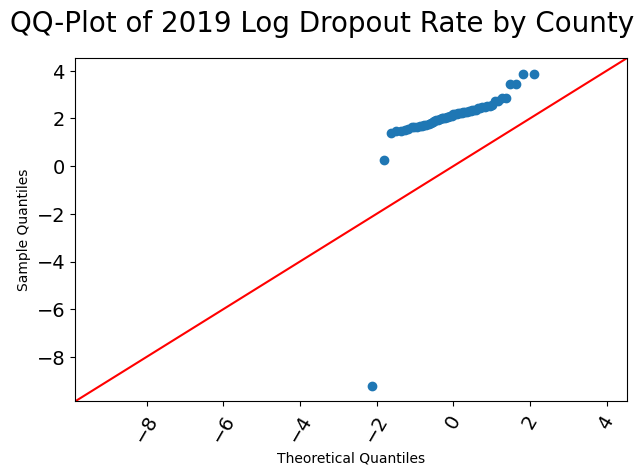

In [10]:
# QQ-plot of log-dropout-rate by county
sm.qqplot(cohorts['dropout_log'], line='45');
plt.suptitle(f'QQ-Plot of 2019 Log Dropout Rate by County', size = 20);
plt.xticks(size = 14, rotation = 60);
plt.yticks(size = 14);
plt.tight_layout();
plt.savefig('./03_images/output/log_dropout_rate_qqplot.png')

In [11]:
# Define my_date()
def my_date():
  return datetime.now().strftime('%Y-%m-%d_h%H-m%M-s%S')
my_date()

# Define autoplots()
def autoplots(d, y, line = False):
  '''a function to make a ton of graphs.
  Each plot is based on a subset of d where all variables in the
  plot have no null values.  The size of this subset (n) is 
  displayed in the subtitle of the plot, and can be used 
  similarly to d.isnull().sum(), if desired.
  
  args:
    d: dataframe, the dataframe of the information
    y: string, the name of the column within the dataframe that is the target
    line: bool, whether to plot line graphs, default = False
  return:
    a ton of plots in a FOLDER
  raise:
    pls no'''
  
  # Need these
  from string import capwords
  import matplotlib.pyplot as plt
  import seaborn as sns
  
  # Make a folder 
  try: 
    os.mkdir('images')
  except:
    pass
  a = f'images/plots_{my_date()}'
  os.mkdir(a)
  
  # Define this once
  n_grand = len(d[y])
  print(n_grand)
  # in future versions, I'd like to raise a warning
  # if len(d[y])!=len(d[d[y].notna()])    
  # (i.e., if there are nulls in the target)
  
  # Give y a good(ish) name
  ty = capwords(y.replace('_', ' '))
  print(ty)
  
  # Plot the distributions of all variables
  for i in d.columns:
    print(i)
    # Give it a good(ish) name
    t = capwords(i.replace('_', ' '))
    print(t)
    
    # Extract the subset dataframe, drop NAs, get n
    df = d[i]
    print(df.shape)
    df.dropna(inplace = True)
    n = len(df)
    
    # Plot a histogram of it
    plt.figure(figsize = (16, 9));
    plt.hist(df, bins = 'auto', color = 'purple');
    plt.suptitle(f'Distribution of {t}', size = 24)
    plt.title(f'Based on {n} Observations out of {n_grand}', size = 18)
    plt.xlabel(f'{t}', size = 20);
    plt.ylabel('Frequency', size = 20);
    plt.xticks(size = 16, rotation = 60);
    plt.yticks(size = 16)
    #plt.tight_layout()
    plt.savefig(f'./{a}/{i}_histogram.png')
    plt.close()
    
    # Plot a boxplot of it
    plt.figure(figsize = (16, 9))
    sns.boxplot(data = df, color = 'purple', orient = 'h')
    plt.suptitle(f'Distribution of {t}', size = 24)
    plt.title(f'Based on {n} Observations out of {n_grand}', size = 18)
    plt.xlabel(f'{t}', size = 20);
    plt.xticks(size = 16, rotation = 60)
    #plt.tight_layout()
    plt.savefig(f'./{a}/{i}_boxplot.png')
    plt.close()
    
  # Drop y from the list
  X = [col for col in list(d.drop(columns = [y]).columns)]
  
  # Make plots of each x against y
  for i in X:
    # Give it a good(ish) name
    t = capwords(i.replace('_', ' '))
    print(t)
    
    # Extract the subset dataframe, drop NAs, get n
    df = d[[i, y]]
    df.dropna(inplace = True)
    n = len(df[y])
    
    # Plot a scatterplot of it against y
    plt.figure(figsize = (16, 9))
    plt.scatter(df[i], df[y], alpha = 0.5, color = 'purple')
    plt.suptitle(f'Relationship between {t} and {ty}', size = 24)
    plt.title(f'Based on {n} Observations out of {n_grand}', size = 18)
    plt.xlabel(f'{t}', size = 20);
    plt.ylabel(f'{ty}', size = 20);
    plt.xticks(size = 16, rotation = 60)
    plt.yticks(size = 16)
    # plt.tight_layout()
    plt.savefig(f'./{a}/{t}-by-{y}_scatterplot.png')
    plt.close()
    
    # Plot a line plot of it against y
    if line==True:
      plt.figure(figsize = (16, 9))
      plt.plot(i, y, data = df, color = 'purple')
      plt.suptitle(f'Relationship between {t} and {ty}', size = 24)
      plt.title(f'Based on {n} Observations out of {n_grand}', size = 18)
      plt.xlabel(f'{t}', size = 20);
      plt.ylabel(f'{ty}', size = 20);
      plt.xticks(size = 16, rotation = 60)
      plt.yticks(size = 16)
      # plt.tight_layout()
      plt.savefig(f'./{a}/{i}-by-{y}_lineplot.png')
      plt.close()
    
  # All together now
  n = len(d[y])
  
  # Plot a line plot of everything against y
  if line==True:
    plt.figure(figsize = (16, 9))
    for i in X:
      print(i)
      plt.plot(i, y, data = d)
    plt.suptitle(f'Relationship between Predictors and {ty}', size = 24)
    plt.title(f'Based on {n_grand} Observations out of {n_grand}', size = 18)
    plt.xlabel(f'{t}', size = 20);
    plt.ylabel(f'{ty}', size = 20);
    plt.xticks(size = 16, rotation = 60)
    plt.yticks(size = 16)
    plt.legend();
    # plt.tight_layout()
    plt.savefig(f'./{a}/all-by-{y}_lineplot.png')
    plt.close()
  
  # Get some correlations
  corr = round(d.corr(numeric_only = True), 2)
  
  # Plot a heatmap
  mask = np.zeros_like(corr)
  mask[np.triu_indices_from(mask)] = True
  plt.figure(figsize = (16, 9))
  sns.heatmap(corr, square = True, 
    annot = True, cmap = 'coolwarm', mask = mask);
  plt.suptitle(f'Relationships Between Variables', size = 24)
  plt.title(f'Based on {n_grand} Observations out of {n_grand}', size = 18)
  # plt.tight_layout()
  plt.savefig(f'./{a}/all_heatmap.png')
  plt.close()
  
  # Plot a heatmap column on y
  if y in corr:
    plt.figure(figsize = (16, 9))
    sns.heatmap(np.asarray([corr[y].sort_values(ascending = False)]).T, 
      vmin = 0, vmax = 1, annot = True, cmap = 'coolwarm')
    plt.suptitle(f'Relationship between Predictors and {ty}', size = 24)
    plt.title(f'Based on {n_grand} Observations out of {n_grand}', size = 18)
    plt.xlabel(f'{ty}', size = 20)
    plt.yticklabels = True
    # plt.tight_layout()
    plt.savefig(f'./{a}/all-by-{y}_heatmap.png')
    plt.close()

In [12]:
# This function will create a new folder, so I'm moving it to output
os.chdir('./02_data/03_output/')
os.getcwd()

'C:\\Users\\emily\\Git_Stuff\\General_Assembly\\04_Projects\\project-4\\dsb318-group4\\02_data\\03_output'

In [14]:
# Run it for raw dropout rates
autoplots(df, 'dropout_rate_2019_cohort', line = False)

# Run it for log dropout rates
df = pd.read_csv('../ca_dropout_and_predictors_v6_eks.csv')
autoplots(df, 'dropout_log', line = False)

print('All done!')

57
Dropout Rate 2019 Cohort
county
County
(57,)
abortion_medicaid_expenditures
Abortion Medicaid Expenditures
(57,)
abortion_rs_count_total
Abortion Rs Count Total
(57,)
abortion_rs_count_total_suppressed
Abortion Rs Count Total Suppressed
(57,)
daycare_slots_child_facility_capacity
Daycare Slots Child Facility Capacity
(57,)
daycare_slots_child_total_pop
Daycare Slots Child Total Pop
(57,)
daycare_slots_child_rate_slots
Daycare Slots Child Rate Slots
(57,)
daycare_slots_child_num_facility
Daycare Slots Child Num Facility
(57,)
daycare_slots_child_pct_nonwhite
Daycare Slots Child Pct Nonwhite
(57,)
daycare_slots_infant_facility_capacity
Daycare Slots Infant Facility Capacity
(57,)
daycare_slots_infant_total_pop
Daycare Slots Infant Total Pop
(57,)
daycare_slots_infant_rate_slots
Daycare Slots Infant Rate Slots
(57,)
daycare_slots_infant_num_facility
Daycare Slots Infant Num Facility
(57,)
daycare_slots_infant_pct_nonwhite
Daycare Slots Infant Pct Nonwhite
(57,)
graduation_2019_cohort_s